In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import seaborn as sns

In [69]:
df = pd.read_csv("archive/supermarket_sales.csv")

In [70]:
count = 0 
for i in range(1000):
    df["Invoice ID"][i] = count
    count= count +1

C:\Users\91887\AppData\Local\Temp/ipykernel_20896/1532015596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Invoice ID"][i] = count


In [72]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [74]:
df.duplicated().sum()

0

In [75]:
df[df.duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [76]:
df['Date'] = pd.to_datetime(df['Date'])

In [77]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
#df['time_dt'] = pd.to_datetime(df['time_str'], format='%H:%M').dt.time

# The 'time_dt' column now contains time objects without the date


In [78]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [80]:
df.set_index("Invoice ID",drop=True,verify_integrity=True,inplace=True)

In [ ]:
# for i in df.columns:
#     if i != "Invoice ID":
#         print(i,":",df[i].unique())

In [81]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
     

for i in df.select_dtypes(include=["object"]).columns:
  df[i]= label.fit_transform(df[i])
     

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   int32         
 1   City                     1000 non-null   int32         
 2   Customer type            1000 non-null   int32         
 3   Gender                   1000 non-null   int32         
 4   Product line             1000 non-null   int32         
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   int32         
 11  Payment                  1000 non-null   int32         
 12  cogs                     1000 non-n

In [83]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2019-01-05,146,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,2019-03-08,23,0,76.40,4.761905,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,2019-03-03,155,1,324.31,4.761905,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2019-01-27,485,2,465.76,4.761905,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2019-02-08,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,1,2.0175,42.3675,2019-01-29,174,2,40.35,4.761905,2.0175,6.2
996,1,0,1,0,4,97.38,10,48.6900,1022.4900,2019-03-02,342,2,973.80,4.761905,48.6900,4.4
997,0,2,0,1,2,31.84,1,1.5920,33.4320,2019-02-09,154,0,31.84,4.761905,1.5920,7.7


In [84]:
from scipy.stats import zscore

In [86]:
import numpy as np
from scipy.stats import zscore
df['z_sales'] = zscore(df['Total'])
#outliers = df[np.abs(df['z_sales']) > 3]
# outlier detection

#The above lines are for finding out the outliers 
#outliers are of three variants, * negative outlier , * positive outlier, outlier equal to the mean (-3,0,+1)

In [87]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,z_sales
Invoice ID,,,,,,,,,,,,,,,,,
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2019-01-05,146,2,522.83,4.761905,26.1415,9.1,0.919607
1,2,1,1,0,0,15.28,5,3.8200,80.2200,2019-03-08,23,0,76.40,4.761905,3.8200,9.6,-0.987730
2,0,2,1,1,4,46.33,7,16.2155,340.5255,2019-03-03,155,1,324.31,4.761905,16.2155,7.4,0.071446
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2019-01-27,485,2,465.76,4.761905,23.2880,8.4,0.675780
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2019-02-08,29,2,604.17,4.761905,30.2085,5.3,1.267125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,1,2.0175,42.3675,2019-01-29,174,2,40.35,4.761905,2.0175,6.2,-1.141750
996,1,0,1,0,4,97.38,10,48.6900,1022.4900,2019-03-02,342,2,973.80,4.761905,48.6900,4.4,2.846340
997,0,2,0,1,2,31.84,1,1.5920,33.4320,2019-02-09,154,0,31.84,4.761905,1.5920,7.7,-1.178109


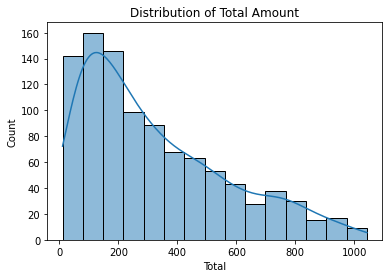

Shapiro-Wilk p-value: 5.303705053546987e-24


In [88]:
from scipy.stats import shapiro

sns.histplot(df['Total'], kde=True)
plt.title('Distribution of Total Amount')
plt.show()

stat, p = shapiro(df['Total'])
print(f"Shapiro-Wilk p-value: {p}")

# What is the distribution of Sales_Amount? Is it normally distributed?
# The histogram with KDE gives a visual sense, while Shapiro-Wilk tests for normality. If p < 0.05, data is not normally distributed.
     

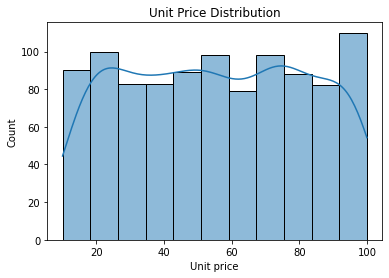

Skewness: 0.007077447853328846


In [ ]:
sns.histplot(df['Unit price'], kde=True)
plt.title('Unit Price Distribution')
plt.show()

print("Skewness:", df['Unit price'].skew())
# Does Unit Price follow a normal or skewed distribution?
# The skewness metric helps identify the direction of skew:Skew ≈ 0 → symmetric, Skew > 0 → right-skewed, Skew < 0 → left-skewed
     

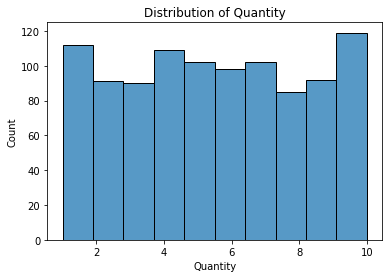

In [ ]:
sns.histplot(df['Quantity'], bins=10, kde=False)
plt.title('Distribution of Quantity')
plt.show()

# Are Quantity values uniformly distributed?
# A flat histogram would suggest a uniform distribution. Real sales data usually clusters (e.g., most values between 10–40).
     

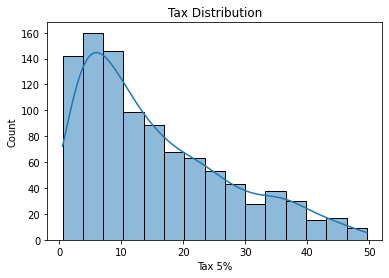

In [93]:
sns.histplot(df['Tax 5%'], kde=True, bins=15)
plt.title('Tax Distribution')
plt.show()

# Does Tax a bimodal or unimodal distribution?
# Check if the KDE line shows one peak (unimodal) or two/more peaks (bimodal). This may indicate tiered discount policies.

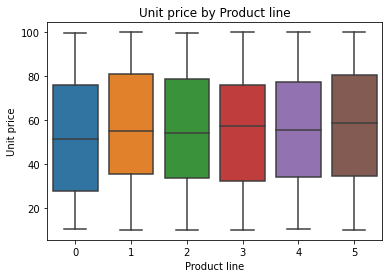

In [ ]:
sns.boxplot(x='Product line', y='Unit price', data=df)
plt.title('Unit price by Product line')
plt.show()

# What is the distribution of Unit price per product line?
# Boxplots show spread, median, and outliers—helpful to compare distributions across categories.

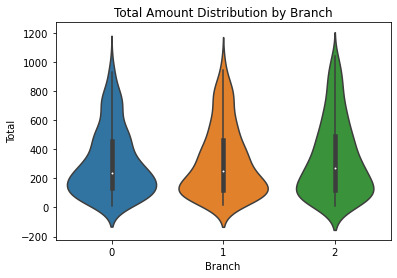

In [96]:
sns.violinplot(x='Branch', y='Total', data=df)
plt.title('Total Amount Distribution by Branch')
plt.show()

# Do different branch have different total amount distributions?
# Violin plots combine KDE with boxplot and show how data is distributed per region.
     

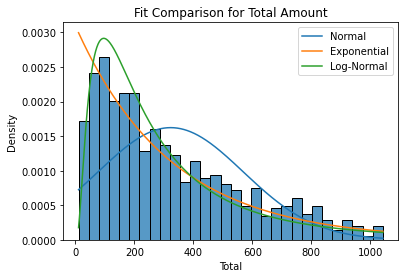

In [97]:
from scipy.stats import norm, expon, lognorm

data = df['Total']
x = np.linspace(data.min(), data.max(), 1000)

sns.histplot(data, kde=False, stat='density', bins=30)

plt.plot(x, norm.pdf(x, data.mean(), data.std()), label='Normal')
plt.plot(x, expon.pdf(x, scale=data.mean()), label='Exponential')
shape, loc, scale = lognorm.fit(data, floc=0)
plt.plot(x, lognorm.pdf(x, shape, loc, scale), label='Log-Normal')

plt.legend()
plt.title('Fit Comparison for Total Amount')
plt.show()

# Which distribution best fits Sales_Amount – Normal, Exponential, or Log-normal?
# Visually compare how closely different theoretical distributions match the actual data.

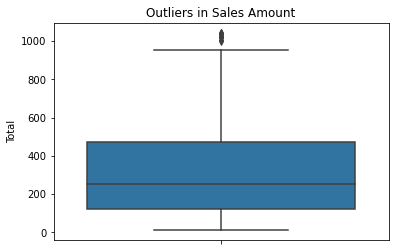

In [98]:
sns.boxplot(y=df['Total'])
plt.title('Outliers in Sales Amount')
plt.show()
# Are there outliers in Sales_Amount?
# Boxplot whiskers highlight potential outliers. You can decide whether to cap, transform, or exclude them.